In [99]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [100]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [101]:
number_of_classes = len(np.unique(train_labels))
print(number_of_classes)
lbl_train = keras.utils.to_categorical(train_labels,number_of_classes)
lbl_test = keras.utils.to_categorical(test_labels,number_of_classes)

10


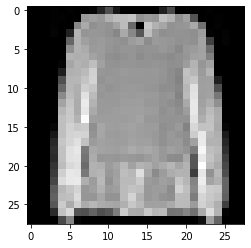

In [102]:
import matplotlib.pyplot as plt
import random
index = random.randint(0,np.size(train_images,-1))
plt.imshow(train_images[index],cmap='gray')

In [103]:
img_train = np.reshape(train_images / 255 , (-1,28,28,1))
img_test = np.reshape(test_images / 255 , (-1,28,28,1))

In [104]:
from keras import layers
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=img_train[0].shape))
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.Conv2D(10,(3,3),activation = 'relu'))
model.add(layers.Conv2D(10,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(number_of_classes,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 10)        2890      
                                                                 
 conv2d_32 (Conv2D)          (None, 20, 20, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 10)       0         
 2D)                                                             
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 32)          2912      
                                                     

In [107]:
optimizer = Adam(lr=0.001)
model.compile(optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [108]:
h=model.fit(img_train,lbl_train,batch_size = 64 , epochs = 100 , validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3931 - accuracy: 0.8526 - val_loss: 0.3670 - val_accuracy: 0.8646
Epoch 2/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3837 - accuracy: 0.8574 - val_loss: 0.3629 - val_accuracy: 0.8677
Epoch 3/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3795 - accuracy: 0.8580 - val_loss: 0.3595 - val_accuracy: 0.8681
Epoch 4/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3749 - accuracy: 0.8606 - val_loss: 0.3599 - val_accuracy: 0.8668
Epoch 5/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3735 - accuracy: 0.8591 - val_loss: 0.3558 - val_accuracy: 0.8688
Epoch 6/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3727 - accuracy: 0.8600 - val_loss: 0.3558 - val_accuracy: 0.8701
Epoch 7/100
750/750 [==============================] - 8s 11ms/step - loss: 0.3671 - accuracy: 0.8622 - val_loss: 0.3529 - val_accuracy:

In [109]:
import matplotlib.pyplot as plt
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

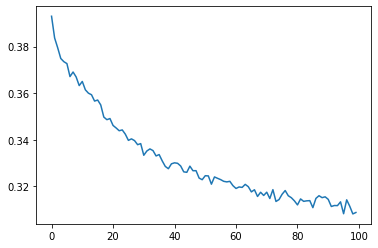

In [110]:
plt.plot(h.history['loss'])

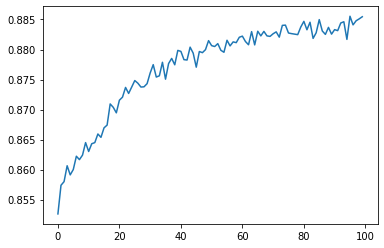

In [111]:
plt.plot(h.history['accuracy'])

In [112]:
model.evaluate(img_test, lbl_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3322 - accuracy: 0.8792


[0.3322041630744934, 0.8791999816894531]